In [1]:
import time
import numpy as np
import os
from keras import layers, models, callbacks, regularizers, optimizers
from keras.layers import advanced_activations
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler as ms
import pandas as pd
import numpy as np
import numpy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import os
import glob
import datetime as dt

from datetime import timedelta
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.callbacks import Callback
from keras.optimizers import adagrad, adam
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

/home/student/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from numpy import concatenate
import pywt

In [3]:
df1 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/swt/object_swt1.csv')
#df2 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/swt/object_swt2.csv')
#df3 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/swt/object_swt3.csv')
#df4 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/swt/object_swt4.csv')


In [4]:
df3.shape

NameError: name 'df3' is not defined

In [5]:
df=pd.DataFrame(df1)
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)


NameError: name 'df2' is not defined

In [5]:
df.shape

(1559720, 13)

In [24]:
df4.shape

(419996, 13)

In [6]:
dff1 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/dwt/object_dwt1.csv')
#dff2 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/dwt/object_dwt2.csv')
#dff3 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/dwt/object_dwt3.csv')
#dff4 = pd.read_csv('/home/student/EEG_DATASET/gdf/data/dwt/object_dwt4.csv')


In [7]:
dfff1=pd.DataFrame(dff1)
dfff1=dfff1.append(dff2)
dfff1=dfff1.append(dff3)
dfff1=dfff1.append(dff4)


In [8]:
dfff1.shape

(1559720, 5)

In [ ]:
839732

In [7]:
df1['case']=list(dff1['case'])

In [8]:
df1['case']=df1['case'].replace(1, 0)
df1['case']=df1['case'].replace(2, 1)

In [9]:
df1.drop(['Unnamed: 0'],inplace = True, axis = 1)

In [10]:
Y=list(df1['case'])
Y=np.asarray(Y)

In [11]:
df1.drop(['case'],inplace = True, axis = 1)

In [12]:
X=df1.iloc[:].values

In [13]:
trainX=X[0:240000]
testX=X[240000:]
trainy=Y[0:240000]
testy=Y[240000:]

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf1= RandomForestClassifier(n_estimators=400,max_depth=None,random_state=0,bootstrap=True)

In [16]:
clf1.fit(trainX, trainy) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
predict=clf1.predict(testX)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(testy, predict)

array([[14526, 15474],
       [14246, 15754]])

In [23]:
trainX=trainX.reshape(240000,1,12)
testX=testX.reshape(60000,1,12)

In [28]:
X1=X.reshape(300000,1,12)

In [25]:
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model


In [44]:
model1 = Sequential()
model1.add(LSTM(12,  input_shape=(1,12),kernel_regularizer=regularizers.l2(0.0001)))
model1.add(RepeatVector(20))
model1.add(LSTM(12,  return_sequences=True,kernel_regularizer=regularizers.l2(0.0001)))
model1.add(TimeDistributed(Dense(12,activation='sigmoid')))
model1.compile(optimizer='adam', loss='mse')


In [45]:
history1=model1.fit(X1, X1,batch_size=128,epochs=20,validation_data=(X1, X1), verbose=1)

ValueError: Error when checking target: expected time_distributed_2 to have shape (20, 12) but got array with shape (1, 12)

In [33]:
model1.layers

In [34]:
model4 = Model(inputs=model1.inputs, outputs=model1.layers[1].output)

In [35]:
yhat1 = model4.predict(X1)

In [36]:
yhat1.shape

(300000, 1, 12)

In [37]:
Xhat=yhat1.reshape(300000,12)

In [38]:
trainX1=Xhat[0:240000]
testX1=Xhat[240000:]


In [39]:
clf1= RandomForestClassifier(n_estimators=100,max_depth=None,random_state=0,bootstrap=True)

In [41]:
clf1.fit(trainX1, trainy) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
pre1=clf1.predict(testX1)

In [43]:
confusion_matrix(testy, pre1)

array([[10015, 19985],
       [ 9620, 20380]])

In [12]:
dff=df.drop(columns=['a', 'c','e','g','i','k'])

In [13]:
dff.shape

(1559720, 7)

In [14]:
dff=dff[0:1559552]
Y=dff['case'].values
dff.drop(['case'], axis = 1, inplace = True)

In [15]:
x=dff.values
x=x.reshape(6092,256,6)

In [16]:
y=Y.reshape(6092,256)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [19]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(256, input_shape=(256,6), return_sequences=True,kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(LSTM(256, input_shape=(128, 6), return_sequences=False,kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
#model.add(LSTM(128,return_sequences=False,kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history2=model.fit(x_train, y_train,batch_size=256,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test, y_test))

Train on 4873 samples, validate on 1219 samples
Epoch 1/200
4873/4873 [==============================] - 71s 15ms/step - loss: 3.1637 - acc: 0.4941 - val_loss: 1.3896 - val_acc: 0.5232

Epoch 00001: val_acc improved from -inf to 0.52324, saving model to waveletsweights.best.hdf5
Epoch 2/200
4873/4873 [==============================] - 66s 13ms/step - loss: 1.5312 - acc: 0.4881 - val_loss: 0.9796 - val_acc: 0.5231

Epoch 00002: val_acc did not improve from 0.52324
Epoch 3/200
4873/4873 [==============================] - 64s 13ms/step - loss: 0.9834 - acc: 0.5044 - val_loss: 0.8328 - val_acc: 0.5149

Epoch 00003: val_acc did not improve from 0.52324
Epoch 4/200
4873/4873 [==============================] - 63s 13ms/step - loss: 0.8677 - acc: 0.4988 - val_loss: 0.8130 - val_acc: 0.5056

Epoch 00004: val_acc did not improve from 0.52324
Epoch 5/200
4873/4873 [==============================] - 64s 13ms/step - loss: 0.8465 - acc: 0.4968 - val_loss: 0.8028 - val_acc: 0.5232

Epoch 00005: val_a

KeyboardInterrupt: 

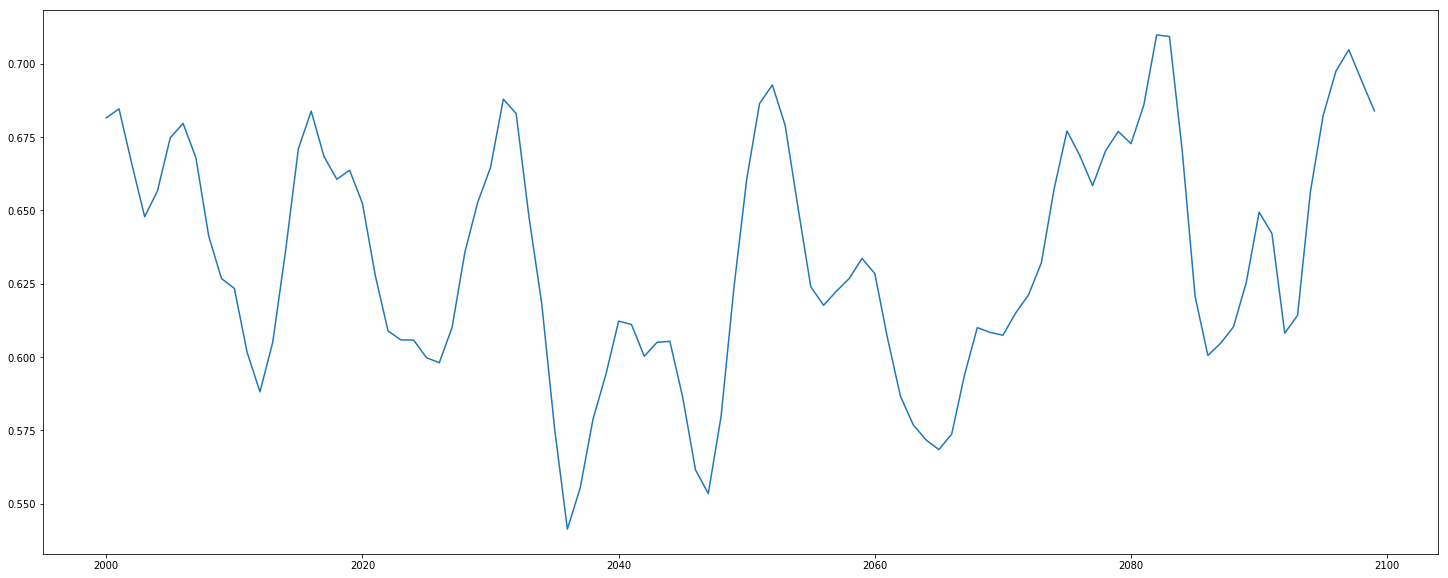

In [26]:
plt.figure(figsize=(25,10))
plt.plot(dff['a'][2000:2100])

In [42]:
from pandas import concat

In [43]:
#helper function to shift the data 
def series_to_supervised(data, n_in, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [44]:
Y=dff['case'].values
dff.drop(['case'], axis = 1, inplace = True)

In [45]:
values1=dff.values

In [16]:
values1.shape

(300000, 6)

In [46]:
reframed1=series_to_supervised(values1, 32 , 1)

In [47]:
reframed1.shape

(299968, 198)

In [48]:
x=reframed1.values
y=Y[0:299968]

In [49]:
x.shape

(299968, 198)

In [50]:
x=x.reshape(299968,1,198)

In [62]:
seed = 2
np.random.seed(seed)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2)

In [66]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(32, input_shape=(32,198), return_sequences=True,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
model.add(LSTM(128, input_shape=(32, 198), return_sequences=False,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
#model.add(LSTM(128,return_sequences=False,kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history2=model.fit(x_train, y_train,batch_size=64,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test, y_test))

Train on 210000 samples, validate on 90000 samples
Epoch 1/200
210000/210000 [==============================] - 12s 59us/step - loss: -7.5745 - acc: 0.1304 - val_loss: -7.9737 - val_acc: 0.0042

Epoch 00001: val_acc improved from -inf to 0.00418, saving model to waveletsweights.best.hdf5
Epoch 2/200
210000/210000 [==============================] - 11s 54us/step - loss: -7.9389 - acc: 0.1954 - val_loss: -7.9894 - val_acc: 0.5018

Epoch 00002: val_acc improved from 0.00418 to 0.50180, saving model to waveletsweights.best.hdf5
Epoch 3/200
210000/210000 [==============================] - 11s 54us/step - loss: -7.9520 - acc: 0.4799 - val_loss: -7.9972 - val_acc: 0.5018

Epoch 00003: val_acc did not improve from 0.50180
Epoch 4/200
210000/210000 [==============================] - 11s 54us/step - loss: -7.9574 - acc: 0.4990 - val_loss: -7.9979 - val_acc: 0.5018

Epoch 00004: val_acc did not improve from 0.50180
Epoch 5/200
210000/210000 [==============================] - 12s 55us/step - loss:

KeyboardInterrupt: 

In [ ]:
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
    return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(original,contrast)
print(d)